# Dataset tidying, class balance, encoding, normalization -> regular train and test subsets

<font color='blue'>Creation of balanced dataset</font>

#### 1.1 Module loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import imblearn
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, FunctionTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
import os.path

#### 0. Variables

In [2]:
ds = "100"
fraction_factor = 1

#### 1.2 Dataset loading

In [3]:
#pathds = '/home/user/01Code/00Datasets_final/helpers/'
pathds = os.path.abspath('/home/user/01Code/00Datasets_final/')
file_name = "sybil_"+ds+"n_with-malicious_labelled.csv"
full_path = os.path.join(pathds,file_name)
print(full_path)

/home/user/01Code/00Datasets_final/sybil_100n_with-malicious_labelled.csv


In [4]:
#Columns
columns_csv = "frame_time_delta,frame_time_epoch,frame_time_relative,frame_cap_len,frame_len,frame_number,ipv6_src,ipv6_dst,ipv6_plen,sixlowpan_pattern,wpan_ack_request,wpan_dst_addr_mode,wpan_fcf,wpan_fcs,wpan_frame_length,wpan_pending,wpan_seq_no,icmpv6_checksum,icmpv6_code,class".split(",")

In [5]:
#Full DS
df_full = pd.read_csv(full_path, low_memory=False, sep=',', names=columns_csv, skiprows=1)
df_full_size = df_full.shape[0]

In [6]:
#DS third of the total
df_chunk = pd.read_csv(full_path, low_memory=False, sep=',', names=columns_csv, skiprows=1, chunksize=1000)
df = df_chunk.get_chunk(int(df_full_size/fraction_factor))

In [7]:
print(df.shape)
print(df_full.shape)

(1492578, 20)
(1492578, 20)


In [8]:
df.head()

,frame_time_delta,frame_time_epoch,frame_time_relative,frame_cap_len,frame_len,frame_number,ipv6_src,ipv6_dst,ipv6_plen,sixlowpan_pattern,wpan_ack_request,wpan_dst_addr_mode,wpan_fcf,wpan_fcs,wpan_frame_length,wpan_pending,wpan_seq_no,icmpv6_checksum,icmpv6_code,class
0,0.000000,1.553720e+09,0.000000,64,64,1,fe80::c30c:0:0:27,ff02::1a,6,0x00000041,0,0x00000002,0x0000d841,0x000010ce,64,0,64,0x0000a3ed,0,0
1,0.003288,1.553720e+09,0.003288,64,64,2,fe80::c30c:0:0:27,ff02::1a,6,0x00000041,0,0x00000002,0x0000d841,0x000010ce,64,0,64,0x0000a3ed,0,0
2,0.003264,1.553720e+09,0.006552,64,64,3,fe80::c30c:0:0:27,ff02::1a,6,0x00000041,0,0x00000002,0x0000d841,0x000010ce,64,0,64,0x0000a3ed,0,0
3,0.003296,1.553720e+09,0.009848,64,64,4,fe80::c30c:0:0:27,ff02::1a,6,0x00000041,0,0x00000002,0x0000d841,0x000010ce,64,0,64,0x0000a3ed,0,0
4,0.003273,1.553720e+09,0.013121,64,64,5,fe80::c30c:0:0:27,ff02::1a,6,0x00000041,0,0x00000002,0x0000d841,0x000010ce,64,0,64,0x0000a3ed,0,0


> I fixed the *names = columns_csv* for more fexibility

### 2. Dropping of nan values in rows and columns

#### 2.1 Finding if there is any column or row with nan values

In [9]:
nan_df = df.isnull().any().tolist()

if True in nan_df: print('**There is nans in df_test!**\n\n', df.isnull().any())
else: print("No nans df")

No nans df


> As it is True in some columns (features) It was required to remove this samples

In [10]:
df.isnull().sum()

frame_time_delta       0
frame_time_epoch       0
frame_time_relative    0
frame_cap_len          0
frame_len              0
frame_number           0
ipv6_src               0
ipv6_dst               0
ipv6_plen              0
sixlowpan_pattern      0
wpan_ack_request       0
wpan_dst_addr_mode     0
wpan_fcf               0
wpan_fcs               0
wpan_frame_length      0
wpan_pending           0
wpan_seq_no            0
icmpv6_checksum        0
icmpv6_code            0
class                  0
dtype: int64

#### 2.2 Removing any nan value in any row or column

In [11]:
df_nonan_row = df.dropna(axis=0, how='all') #dropping rows whose any value is nan 

In [12]:
df_nonan_rowcol = df_nonan_row.dropna(axis=1, how='any') #dropping columns whose any value is nan 

In [13]:
df = df_nonan_rowcol # dataset without nan values

In [14]:
nan_df = df.isnull().any().tolist()

if True in nan_df: print('**There is nans in df_test!**\n\n', df.isnull().any())
else: print("No nans df")

No nans df


> As is expected the dataset is now ready to the next step

In [15]:
df.shape

(1492578, 20)

### 3. Special care of hex values in string format

#### 3.1 Conversion of sring values into int

In [16]:
df['wpan_dst_addr_mode'] = df.wpan_dst_addr_mode.apply(int, base=16)
df['wpan_fcf'] = df.wpan_fcf.apply(int, base=16)
df['wpan_fcs'] = df.wpan_fcs.apply(int, base=16)
df['sixlowpan_pattern'] = df.sixlowpan_pattern.apply(int, base=16)
df['icmpv6_checksum'] = df.icmpv6_checksum.apply(int, base=16)

> Two features exhibited values in unsigned byte type (string hex values), therefore it was necessary to convert them into int values

In [17]:
df.head()

,frame_time_delta,frame_time_epoch,frame_time_relative,frame_cap_len,frame_len,frame_number,ipv6_src,ipv6_dst,ipv6_plen,sixlowpan_pattern,wpan_ack_request,wpan_dst_addr_mode,wpan_fcf,wpan_fcs,wpan_frame_length,wpan_pending,wpan_seq_no,icmpv6_checksum,icmpv6_code,class
0,0.000000,1.553720e+09,0.000000,64,64,1,fe80::c30c:0:0:27,ff02::1a,6,65,0,2,55361,4302,64,0,64,41965,0,0
1,0.003288,1.553720e+09,0.003288,64,64,2,fe80::c30c:0:0:27,ff02::1a,6,65,0,2,55361,4302,64,0,64,41965,0,0
2,0.003264,1.553720e+09,0.006552,64,64,3,fe80::c30c:0:0:27,ff02::1a,6,65,0,2,55361,4302,64,0,64,41965,0,0
3,0.003296,1.553720e+09,0.009848,64,64,4,fe80::c30c:0:0:27,ff02::1a,6,65,0,2,55361,4302,64,0,64,41965,0,0
4,0.003273,1.553720e+09,0.013121,64,64,5,fe80::c30c:0:0:27,ff02::1a,6,65,0,2,55361,4302,64,0,64,41965,0,0


### 4. Dataset Pre-processing 

#### 4.1 Finding out features data type 

In [18]:
df.columns

Index(['frame_time_delta', 'frame_time_epoch', 'frame_time_relative',
       'frame_cap_len', 'frame_len', 'frame_number', 'ipv6_src', 'ipv6_dst',
       'ipv6_plen', 'sixlowpan_pattern', 'wpan_ack_request',
       'wpan_dst_addr_mode', 'wpan_fcf', 'wpan_fcs', 'wpan_frame_length',
       'wpan_pending', 'wpan_seq_no', 'icmpv6_checksum', 'icmpv6_code',
       'class'],
      dtype='object')

In [19]:
df.get_dtype_counts()

float64     3
int64      15
object      2
dtype: int64

In [20]:
df.select_dtypes('object').columns

Index(['ipv6_src', 'ipv6_dst'], dtype='object')

> It is necessary to encode the object dtype features into numerical, using Label Encoding. Also it is indispensable to encode any others categorical features such as icmpv6.type, icmpv6.code , 6lowpan.pattern, wpan.dst_addr_mode using one-hot (1-to-n) encoding.

#### 4.2 Explaining the data

Class 0: 1039416
Class 1: 453162
Proportion: 2.294 : 1


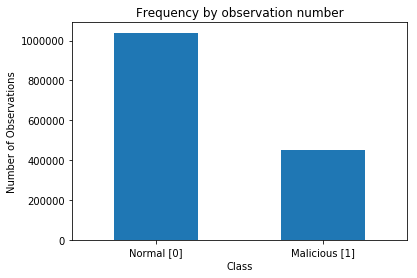

In [21]:
#if you don't have an intuitive sense of how imbalanced these two classes are, let's go visual
count_classes = pd.value_counts(df['class'], sort = True)
print('Class 0:', count_classes[0])
print('Class 1:', count_classes[1])
print('Proportion:', round(count_classes[0] / count_classes[1], 3), ': 1')

count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(2), ['Normal [0]','Malicious [1]'])
plt.title("Frequency by observation number")
plt.xlabel("Class")
plt.ylabel("Number of Observations");

##### 4.2.1 Dataset Balancing by ROS

In [22]:
X = df.iloc[:, 0:19] 
y = df.iloc[:, 19]

586254 new random picked points
Class 0: 1039416
Class 1: 1039416
Proportion: 1.0 : 1


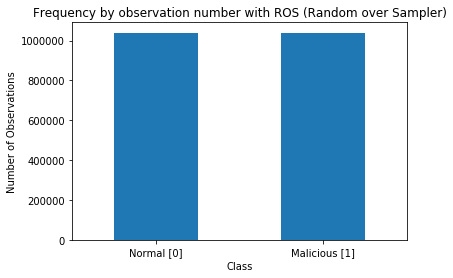

In [23]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X, y)

print(X_ros.shape[0] - X.shape[0], 'new random picked points')

count_classes_ros = pd.value_counts(y_ros, sort = True)
print('Class 0:', count_classes_ros[0])
print('Class 1:', count_classes_ros[1])
print('Proportion:', round(count_classes_ros[0] / count_classes_ros[1], 2), ': 1')

count_classes_ros.plot(kind = 'bar', rot=0)
plt.xticks(range(2), ['Normal [0]','Malicious [1]'])
plt.title("Frequency by observation number with ROS (Random over Sampler)")
plt.xlabel("Class")
plt.ylabel("Number of Observations");

In [24]:
columns_csv_ros = df.columns.tolist()[:-1]
# columns_csv_ros

In [25]:
df_y_ros = pd.DataFrame(y_ros, columns=['class'])
print(df_y_ros.shape)

df_x_ros = pd.DataFrame(X_ros, columns=columns_csv_ros)
print(df_x_ros.shape)

(2078832, 1)
(2078832, 19)


In [26]:
df_ros = pd.concat([df_x_ros, df_y_ros], axis=1, ignore_index=False)
print(df_ros.shape)

(2078832, 20)


In [27]:
df = df_ros

In [28]:
df.head()

,frame_time_delta,frame_time_epoch,frame_time_relative,frame_cap_len,frame_len,frame_number,ipv6_src,ipv6_dst,ipv6_plen,sixlowpan_pattern,wpan_ack_request,wpan_dst_addr_mode,wpan_fcf,wpan_fcs,wpan_frame_length,wpan_pending,wpan_seq_no,icmpv6_checksum,icmpv6_code,class
0,0,1.55372e+09,0,64,64,1,fe80::c30c:0:0:27,ff02::1a,6,65,0,2,55361,4302,64,0,64,41965,0,0
1,0.003288,1.55372e+09,0.003288,64,64,2,fe80::c30c:0:0:27,ff02::1a,6,65,0,2,55361,4302,64,0,64,41965,0,0
2,0.003264,1.55372e+09,0.006552,64,64,3,fe80::c30c:0:0:27,ff02::1a,6,65,0,2,55361,4302,64,0,64,41965,0,0
3,0.003296,1.55372e+09,0.009848,64,64,4,fe80::c30c:0:0:27,ff02::1a,6,65,0,2,55361,4302,64,0,64,41965,0,0
4,0.003273,1.55372e+09,0.013121,64,64,5,fe80::c30c:0:0:27,ff02::1a,6,65,0,2,55361,4302,64,0,64,41965,0,0


#### 4.2 Label encoding for columns 'ipv6_src', 'ipv6_dst'

In [29]:
le = LabelEncoder()
df.iloc[:,6] = le.fit_transform(df.iloc[:,6])
df.iloc[:,7] = le.fit_transform(df.iloc[:,7])

In [30]:
print("Unique values for ipv6_src feature",df.iloc[:,6].unique())
print("Unique values for ipv6_dst feature",df.iloc[:,7].unique())

Unique values for ipv6_src feature [26 42 22 84 18 10 39 66 79 81 46 71 59 27 43 23 50 14 55 51  1 19 88 72
  3 62 31 30  6 69 67 63 11  7 34  2 76 75 56 36  0 47 15 85 24 40 74 60
 21 37 38 78 58  4 89 29 83 44 53 80 64 87 48 70 20 35 54  9  8 28 65 57
 45 32 17 86 73 41 52 12 68 82 77 16 49 13 61 25 90  5 33]
Unique values for ipv6_dst feature [91  0 18 21 37 24 11 23 74  2 70 78 20 88 72  9 38 86 68 32 66 79 46 22
 39 42 26 82 48 81 10 16 36 31 85 50 60 76 13  1 73 69 43 14 67 63 34 17
 53 65 40 55 12 71 89 57 47 30  4 84 41 77  6 28 33  7 64 29 27 51 49 58
 15 59 87 90 83 61 19 45 80 52  5 35 44 62 75  3 54 56  8 25]


> As it is showed, the former object values are now numerical 

#### 4.3 Normalization of frame_time_epoch

In [31]:
df['frame_time_epoch'] = df['frame_time_epoch'].astype(float)

In [32]:
# df['frame_time_epoch'] = df['frame_time_epoch'] - df.frame_time_epoch.min()

In [33]:
df.frame_time_epoch.describe()

count    2.078832e+06
mean     1.554087e+09
std      1.633915e+05
min      1.553720e+09
25%      1.553964e+09
50%      1.554168e+09
75%      1.554206e+09
max      1.554215e+09
Name: frame_time_epoch, dtype: float64

In [34]:
df['frame_time_epoch'] = np.log1p(df['frame_time_epoch'])

In [35]:
df.frame_time_epoch.describe()

count    2.078832e+06
mean     2.116415e+01
std      1.051426e-04
min      2.116392e+01
25%      2.116407e+01
50%      2.116421e+01
75%      2.116423e+01
max      2.116424e+01
Name: frame_time_epoch, dtype: float64

In [36]:
# df.head()

#### 4.4 One hot encoding of categorical features using ColumnTransformer and min-max normalization

In [37]:
onehot_col = ['ipv6_dst', 'ipv6_src', 'icmpv6_code', 'wpan_dst_addr_mode', 'wpan_fcf', 'sixlowpan_pattern']
#onehot_col

In [38]:
#log_col = df.select_dtypes('float').columns.tolist()
#log_col = ['frame_time_delta', 'frame_time_epoch', 'frame_time_relative']
#log_col = []

In [39]:
int_col = ['frame_time_delta', 'frame_time_epoch', 'frame_time_relative', 'frame_cap_len', 'frame_len', 'frame_number', 'wpan_fcs', 'wpan_frame_length', 'wpan_seq_no', 'ipv6_plen', 'icmpv6_checksum']
#int_col

In [40]:
#minmax_col = log_col+ int_col + onehot_col 
minmax_col = int_col + onehot_col 
#minmax_col

In [41]:
# transformer = FunctionTransformer(np.log1p)

In [42]:
preprocess = make_column_transformer(
    #(transformer, log_col),
    (MinMaxScaler(copy=True, feature_range=(0, 1)), minmax_col),
    (OneHotEncoder(categories='auto', sparse=False), onehot_col)
)

In [43]:
df.shape

(2078832, 20)

In [44]:
df.columns.get_loc('class')

19

In [45]:
X = df.iloc[:, 0:19] 
y = df.iloc[:, 19]

In [46]:
X_norm = preprocess.fit_transform(X)

/home/user/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [47]:
# for i in range(0,48):
#     print(i, X_norm[:,i].mean())

#### 4.5 Comparison between Original Dataset and Balanced Dataset

In [48]:
print('Label Encoded Dataset shape:', df.iloc[:, 0:19].shape)
print('Normalized Dataset shape:', X_norm.shape)

Label Encoded Dataset shape: (2078832, 19)
Normalized Dataset shape: (2078832, 210)


In [49]:
print('Class subset shape:', y.shape)

Class subset shape: (2078832,)


In [50]:
df_y_csv = pd.DataFrame(y)
print(df_y_csv.shape)

df_x_csv = pd.DataFrame(X_norm)
print(df_x_csv.shape)

(2078832, 1)
(2078832, 210)


In [51]:
df_x_csv.reset_index(drop=True, inplace=True)
df_y_csv.reset_index(drop=True, inplace=True)

In [52]:
df_allsamples_norm = pd.concat((df_x_csv,df_y_csv), axis=1)

In [53]:
print(df_allsamples_norm.shape)

(2078832, 211)


In [54]:
nan_df_allsamples_norm = df_allsamples_norm.isnull().any().tolist()

if True in nan_df_allsamples_norm: print('**There is nans in df_test!**\n\n', df_allsamples_norm.isnull().any())
else: print("No nans in df_allsamples_norm")

No nans in df_allsamples_norm


#### 5. Writing Balanced Dataset

In [ ]:
if fraction_factor == 3:
    ds_prefix = "Third"
elif fraction_factor == 2:
    ds_prefix = "Half"
elif fraction_factor == 1:
    ds_prefix = "Full"
print(ds_prefix)

Full


In [ ]:
df_allsamples_norm.to_csv(os.path.join(pathds,"00BalancedDS/"+ds_prefix+"CloneID"+ds+"bal_minmax.csv"), index=False)

In [ ]:
print(df_allsamples_norm.shape)

(2078832, 211)


In [ ]:
df_from_csv = pd.read_csv(os.path.join(pathds,"00BalancedDS/"+ds_prefix+"CloneID"+ds+"bal_minmax.csv"))

In [ ]:
nan_df_from_csv = df_from_csv.isnull().any().tolist()

if True in nan_df_from_csv: print('**There is nans in df_test!**\n\n', df_from_csv.isnull().any())
else: print("No nans in df_allsamples_norm")

In [ ]:
print(df_from_csv.shape)
print(df_from_csv.shape[1])

In [ ]:
df_from_csv.head()

In [ ]:
X_ = df_from_csv.iloc[:, 0:df_from_csv.shape[1]-1] 
X_.describe()

In [ ]:
y_ = df_from_csv.iloc[:, df_from_csv.shape[1]-1]

In [ ]:
y_.describe()

In [ ]:
del df
del df_from_csv
del X_
del y_
del df_allsamples_norm
del X
del y
del X_norm
del df_full